In [93]:
!pip3 install seaborn
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [79]:
# Load csv file 
netflix_data = pd.read_csv("NetflixReportAddInfo.csv")

netflix_data.info()
netflix_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16161 entries, 0 to 16160
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                16161 non-null  object 
 1   Season               5967 non-null   float64
 2   Available Globally?  16161 non-null  object 
 3   Release Date         6668 non-null   object 
 4   Hours Viewed         16161 non-null  int64  
 5   Runtime              16161 non-null  object 
 6   Views                16161 non-null  int64  
 7   Content Type         16161 non-null  object 
 8   Netflix Original?    16161 non-null  object 
 9   Genres               3840 non-null   object 
 10  Language             3840 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.4+ MB


,Title,Season,Available Globally?,Release Date,Hours Viewed,Runtime,Views,Content Type,Netflix Original?,Genres,Language
0,"""Sr.""",NaN,Yes,2022-12-02,100000,1:29,100000,Film,Yes,Documentary,English
1,#Alive,NaN,Yes,2020-09-08,7100000,1:38,4300000,Film,No,NaN,NaN
2,#FriendButMarried,NaN,No,NaN,200000,1:42,100000,Film,No,NaN,NaN
3,#FriendButMarried 2,NaN,No,NaN,200000,1:44,100000,Film,No,NaN,NaN
4,#Manhole,NaN,No,NaN,300000,1:40,200000,Film,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16156,Slub Doskonaly,1.0,No,NaN,900000,2:16,400000,TV,No,NaN,NaN
16157,tHt lwSy@,1.0,No,NaN,500000,9:00,100000,TV,No,NaN,NaN
16158,Carol & The End of The World,1.0,Yes,2023-12-15,10000000,4:51,2100000,TV,Yes,"Adult Animation,Animation,Comedy,Drama",English
16159,[(OSHI NO KO)],1.0,No,NaN,3600000,5:26,700000,TV,No,NaN,NaN


## Plot 

In [80]:
netflix_data = netflix_data.sort_values(by='Views', ascending=False).reset_index(drop=True)
netflix_originals = netflix_data[netflix_data["Netflix Original?"] == "Yes"]

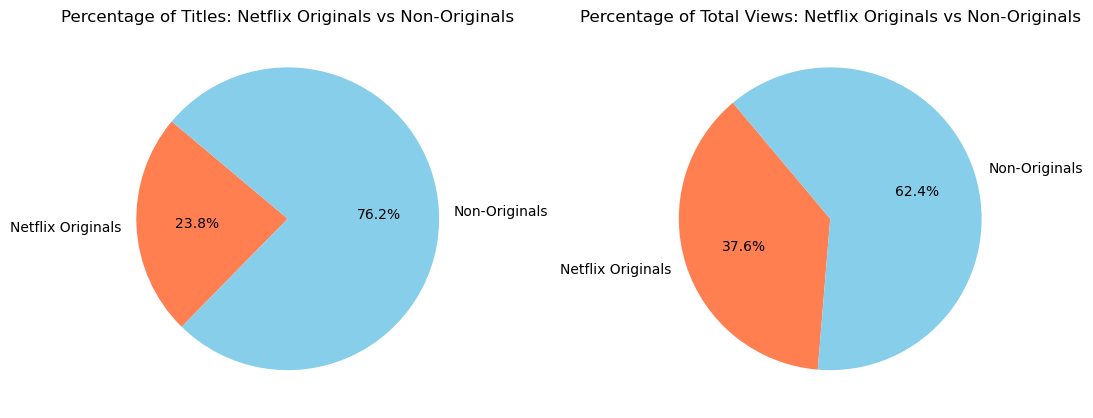

In [81]:
# Calculate the percentage of Originals in the total dataset
total_titles = netflix_data.shape[0]
total_originals = netflix_originals.shape[0]
originals_title_percentage = (total_originals / total_titles) * 100
non_originals_title_percentage = 100 - originals_title_percentage

# Data for the second pie chart
labels_titles = ['Netflix Originals', 'Non-Originals']
sizes_titles = [originals_title_percentage, non_originals_title_percentage]
colors_titles = ['coral', 'skyblue']

# Create subplots for both pie charts
fig, axes = plt.subplots(1, 2, figsize=(11, 5))

# Calculate percentages
total_views = netflix_data['Views'].sum()
netflix_originals = netflix_data[netflix_data['Netflix Original?'] == 'Yes']
total_originals_views = netflix_originals['Views'].sum()
originals_percentage = (total_originals_views / total_views) * 100
non_originals_percentage = 100 - originals_percentage

# Data for the pie chart
labels = ['Netflix Originals', 'Non-Originals']
sizes = [originals_percentage, non_originals_percentage]
colors = ['coral', 'skyblue']

# Percentage of originals in total titles
axes[0].pie(sizes_titles, labels=labels_titles, autopct='%1.1f%%', startangle=140, colors=colors_titles)
axes[0].set_title('Percentage of Titles: Netflix Originals vs Non-Originals')

# Percentage of views for Originals vs Non-Originals
axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=130, colors=colors)
axes[1].set_title('Percentage of Total Views: Netflix Originals vs Non-Originals')

plt.tight_layout()
plt.show()

/var/folders/dt/npwm56kx383b7_d7m4gcvwch0000gn/T/ipykernel_76439/752914616.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


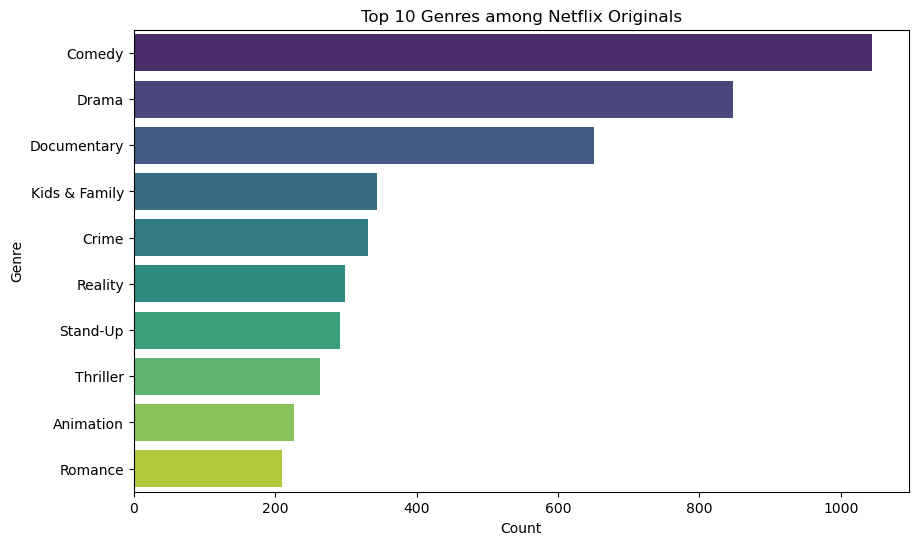

/var/folders/dt/npwm56kx383b7_d7m4gcvwch0000gn/T/ipykernel_76439/752914616.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_languages.values, y=top_languages.index, palette="viridis")


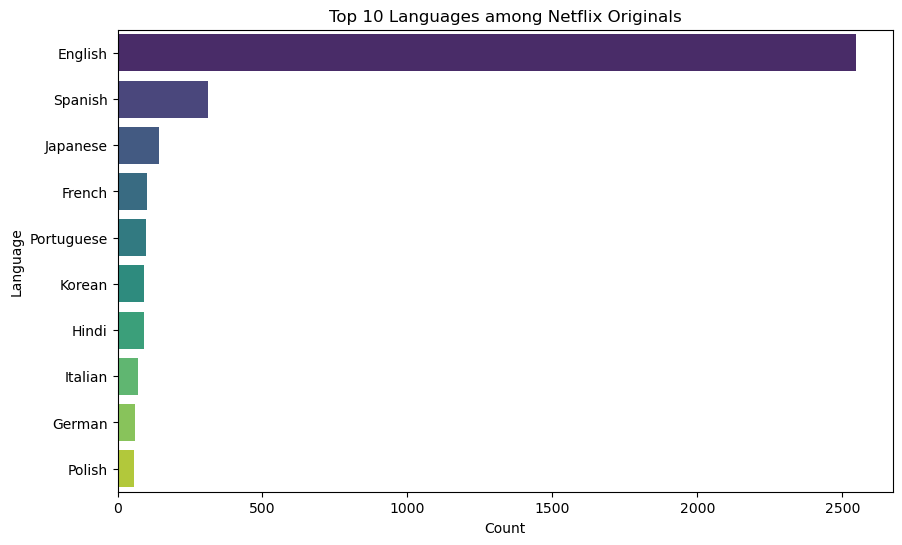

In [99]:
genre_counts = netflix_originals['Genres'].dropna().str.split(',').explode().value_counts()

# Top 10 genres
top_genres = genre_counts.head(10)

# Plotting Top Genres
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title('Top 10 Genres among Netflix Originals')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# Count languages
language_counts = netflix_originals['Language'].dropna().value_counts()

# Top 10 languages
top_languages = language_counts.head(10)

# Plotting Top Languages
plt.figure(figsize=(10, 6))
sns.barplot(x=top_languages.values, y=top_languages.index, palette="viridis")
plt.title('Top 10 Languages among Netflix Originals')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()

In [82]:
# Convert columns to binary
netflix_data['Netflix Original?'] = netflix_data['Netflix Original?'].apply(lambda x: 1 if x == 'Yes' else 0)
netflix_data['Available Globally?'] = netflix_data['Available Globally?'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert 'Runtime' to minutes
def convert_runtime(runtime):
    try:
        if pd.isna(runtime):
            return None
        hours, minutes = map(int, runtime.split(':'))  # Split and convert to integers
        return hours * 60 + minutes
    except (ValueError, AttributeError):  # cases where runtime is invalid
        return None

netflix_data['Runtime (Minutes)'] = netflix_data['Runtime'].apply(convert_runtime)

# Drop rows with missing values in selected columns
netflix_df_cleaned = netflix_data.dropna(subset=['Hours Viewed', 'Views', 'Runtime (Minutes)'])

netflix_df_cleaned

,Title,Season,Available Globally?,Release Date,Hours Viewed,Runtime,Views,Content Type,Netflix Original?,Genres,Language,Runtime (Minutes)
0,Damsel,NaN,1,2024-03-08,263700000,1:50,143800000,Film,1,"Action,Fantasy",English,110.0
1,Lift,NaN,1,2024-01-12,230800000,1:47,129400000,Film,1,"Action,Comedy,Thriller",English,107.0
2,Fool Me Once,1.0,1,2024-01-01,689500000,6:25,107500000,TV,1,"Drama,Thriller",English,385.0
3,Society of the Snow,NaN,1,2024-01-04,252500000,2:26,103800000,Film,1,"Action,Drama",Spanish,146.0
4,Bridgerton,3.0,1,2024-05-16,733800000,7:59,91900000,TV,1,"History,Drama,Romance",English,479.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16156,The Butterfly's Dream,NaN,0,NaN,100000,1:58,100000,Film,0,NaN,NaN,118.0
16157,The Butterfly Effect,NaN,0,NaN,200000,1:54,100000,Film,0,NaN,NaN,114.0
16158,The Brothers,NaN,0,2001-01-01,100000,1:42,100000,Film,0,NaN,NaN,102.0
16159,The Bromley Boys,NaN,0,NaN,100000,1:42,100000,Film,0,NaN,NaN,102.0


In [96]:
netflix_df_cleaned.loc[:, 'Log Views'] = np.log1p(netflix_df_cleaned['Views'])

# Define variables
X = netflix_df_cleaned[['Netflix Original?']]
y = netflix_df_cleaned['Log Views']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predictions
y_pred = reg.predict(X_test)

# Model insights
print("Intercept:", reg.intercept_)
print("Coefficient for Netflix Original?:", reg.coef_[0])
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Intercept: 12.811962014361928
Coefficient for Netflix Original?: 0.7043283561575088
Mean Squared Error: 1.9217498792832037
R-squared: 0.04640471607182839


In [94]:
avg_views = netflix_df_cleaned.groupby('Netflix Original?')['Views'].mean()
print(avg_views)

Netflix Original?
0    1.217789e+06
1    2.366119e+06
Name: Views, dtype: float64


## WIP

In [85]:
correlation_education_income = netflix_data['Views'].corr(netflix_data['Binary Original'])
print(f'Correlation between Views and Netflix Original: {correlation_education_income}')


KeyError: 'Binary Original'

In [ ]:
!pip3 install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as py
from sklearn.linear_model import LinearRegression

In [ ]:
# Columns for income, education, and a confounding variable (SES used as example if present)
income_column = 'Views'
education_column = 'Binary Original'
confound_column = 'Binary Global Availability'  # Assuming SES could serve as a confound if it's in the data

# Check if required columns exist in the dataset
if education_column in netflix_data.columns and income_column in netflix_data.columns and confound_column in netflix_data.columns:
    # Step 1: Predict income from SES
    X_confound_income = netflix_data[confound_column].values.reshape(-1, 1)  # Predictor: SES
    y_income = netflix_data[income_column].values  # Outcome: Income
    model_income = LinearRegression().fit(X_confound_income, y_income)
    residuals_income = y_income - model_income.predict(X_confound_income)

    # Step 2: Predict education from SES
    y_education = netflix_data[education_column].values  # Outcome: Education
    model_education = LinearRegression().fit(X_confound_income, y_education)
    residuals_education = y_education - model_education.predict(X_confound_income)

    # Step 3: Calculate partial correlation between residuals
    partial_corr = np.corrcoef(residuals_income, residuals_education)[0, 1]
    print(f'Partial correlation between Views and Netflix Original, controlling for Global: {partial_corr}')
else:
    print("Required columns for partial correlation (Education, Income, SES) not found in the dataset.")
 

Partial correlation between Views and Netflix Original, controlling for Global: 0.01611475261583554


R^2 for multiple regression model predicting Views from Original and Global Availability: 0.021
Intercept: 1094011.7952695806
Coefficients: [ 225464.58947224 1323360.93383417] (Original, Global Avail)


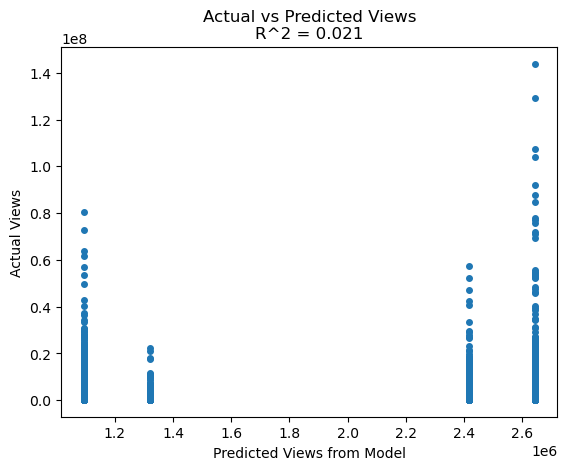

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt #Always good to be able to make plots

# Ensure columns for education, SES, and income exist in the data
income_column = 'Views'
education_column = 'Binary Original'
ses_column = 'Binary Global Availability'

# Check if columns exist in dataset
if education_column in netflix_data.columns and income_column in netflix_data.columns and ses_column in netflix_data.columns:
    # Prepare predictor variables (Education and SES) and outcome variable (Income)
    X = netflix_data[[education_column, ses_column]].values  # Predictors: Education and SES
    y = netflix_data[income_column].values  # Outcome: Income

    # Initialize and fit the multiple regression model
    multiple_regression_model = LinearRegression().fit(X, y)
    
    # Extract R^2, intercept, and coefficients
    r_squared = multiple_regression_model.score(X, y)
    intercept = multiple_regression_model.intercept_
    coefficients = multiple_regression_model.coef_

    # Display results
    print(f'R^2 for multiple regression model predicting Views from Original and Global Availability: {r_squared:.3f}')
    print(f'Intercept: {intercept}')
    print(f'Coefficients: {coefficients} (Original, Global Avail)')

    # Visualize the actual vs predicted income
    y_hat = multiple_regression_model.predict(X)  # Predicted income from the model
    plt.plot(y_hat, y, 'o', markersize=4)
    plt.xlabel('Predicted Views from Model')
    plt.ylabel('Actual Views')
    plt.title(f'Actual vs Predicted Views\nR^2 = {r_squared:.3f}')
else:
    print("Required columns (Education, SES, Income) not found in the dataset.")


In [ ]:
netflix_report_sorted = netflix_originals.sort_values(by='Views', ascending=False).reset_index(drop=True)
netflix_report_sorted

,Title,Season,Available Globally?,Release Date,Hours Viewed,Runtime,Views,Content Type,Netflix Original?,Genres,Language
0,Damsel,NaN,Yes,2024-03-08,263700000,1:50,143800000,Film,Yes,"Action,Fantasy",English
1,Lift,NaN,Yes,2024-01-12,230800000,1:47,129400000,Film,Yes,"Action,Comedy,Thriller",English
2,Fool Me Once,1.0,Yes,2024-01-01,689500000,6:25,107500000,TV,Yes,"Drama,Thriller",English
3,Society of the Snow,NaN,Yes,2024-01-04,252500000,2:26,103800000,Film,Yes,"Action,Drama",Spanish
4,Bridgerton,3.0,Yes,2024-05-16,733800000,7:59,91900000,TV,Yes,"History,Drama,Romance",English
...,...,...,...,...,...,...,...,...,...,...,...
3835,"Sex, Explained",1.0,Yes,2020-01-02,200000,1:51,100000,TV,Yes,Documentary,English
3836,Shot in the Dark,1.0,No,2017-11-17,400000,4:57,100000,TV,Yes,"Documentary,Crime",English
3837,Reign Supreme,1.0,Yes,2022-11-18,400000,4:56,100000,TV,Yes,"Biography,Drama",French
3838,She's Gotta Have It,1.0,Yes,2017-11-23,400000,5:51,100000,TV,Yes,"Comedy,Drama",English
